In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Ejercicio 3

##### Primer conjunto de datos

In [304]:
x = [-1,0,2,3]
y = [-1,3,11,27]

tabla = pd.DataFrame({'x': x, 'y': y})

print(tabla)

   x   y
0 -1  -1
1  0   3
2  2  11
3  3  27


In [305]:
def matriz_van_der_monde(valores_x, grado):

    A = [[1] * len(valores_x)]

    for i in range(1, grado + 1):

        fila = []

        for j in range(len(valores_x)):
            fila.append(valores_x[j] ** i)
        
        A.append(fila)

    return np.transpose(np.array(A))

In [306]:
b = np.array(list(tabla['y']))

# polinomio grado 1
A = matriz_van_der_monde(list(tabla['x']), 1)
x = list( np.linalg.solve( np.transpose(A)@A, np.transpose(A)@b ) )[::-1]
polinomio1 = np.poly1d(x)

# polinomio grado 2
A = matriz_van_der_monde(list(tabla['x']), 2)
x = list( np.linalg.solve( np.transpose(A)@A, np.transpose(A)@b ) )[::-1]
polinomio2 = np.poly1d(x)

# polinomio grado 3
A = matriz_van_der_monde(list(tabla['x']), 3)
x = list( np.linalg.solve( np.transpose(A)@A, np.transpose(A)@b ) )[::-1]
polinomio3 = np.poly1d(x)

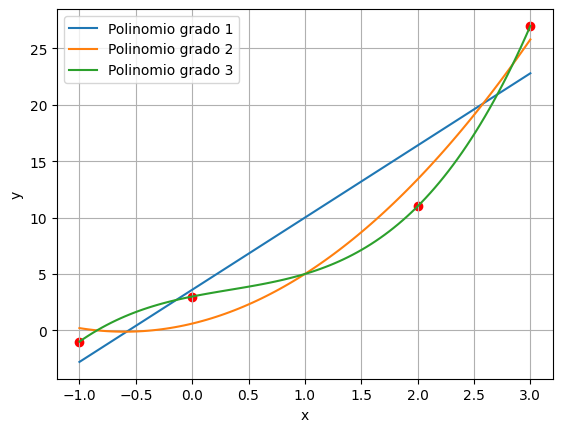

In [307]:
x = np.linspace(-1, 3, 100)
plt.plot(x, polinomio1(x), label='Polinomio grado 1')
plt.plot(x, polinomio2(x), label='Polinomio grado 2')
plt.plot(x, polinomio3(x), label='Polinomio grado 3')
plt.scatter(tabla['x'], tabla['y'], c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

##### Segundo conjunto de datos

In [308]:
x = [-1,0,1,2]
y = [-3,1,1,3]

tabla = pd.DataFrame({'x': x, 'y': y})

print(tabla)

   x  y
0 -1 -3
1  0  1
2  1  1
3  2  3


In [309]:
b = np.array(list(tabla['y']))

# polinomio grado 1
A = matriz_van_der_monde(list(tabla['x']), 1)
x = list( np.linalg.solve( np.transpose(A)@A, np.transpose(A)@b ) )[::-1]
polinomio1 = np.poly1d(x)

# polinomio grado 2
A = matriz_van_der_monde(list(tabla['x']), 2)
x = list( np.linalg.solve( np.transpose(A)@A, np.transpose(A)@b ) )[::-1]
polinomio2 = np.poly1d(x)

# polinomio grado 3
A = matriz_van_der_monde(list(tabla['x']), 3)
x = list( np.linalg.solve( np.transpose(A)@A, np.transpose(A)@b ) )[::-1]
polinomio3 = np.poly1d(x)

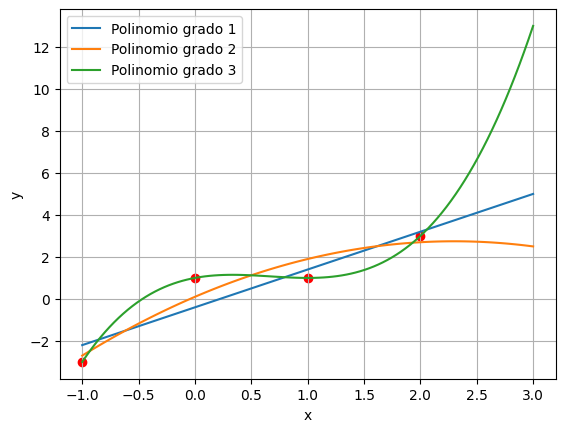

In [310]:
x = np.linspace(-1, 3, 100)
plt.plot(x, polinomio1(x), label='Polinomio grado 1')
plt.plot(x, polinomio2(x), label='Polinomio grado 2')
plt.plot(x, polinomio3(x), label='Polinomio grado 3')
plt.scatter(tabla['x'], tabla['y'], c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### Ejercicio 5

##### Inciso A

In [311]:
x = [1950,1960,1970,1980,1990,2000]
y = [17,20.5,23.9,27.9,32.6,36.9]

tabla = pd.DataFrame({'x': x, 'y': y})

print(tabla)

      x     y
0  1950  17.0
1  1960  20.5
2  1970  23.9
3  1980  27.9
4  1990  32.6
5  2000  36.9


In [312]:
polinomio = np.poly1d( np.polyfit(tabla['x'], tabla['y'], 1) )

In [313]:
print(polinomio)

 
0.3994 x - 762.4


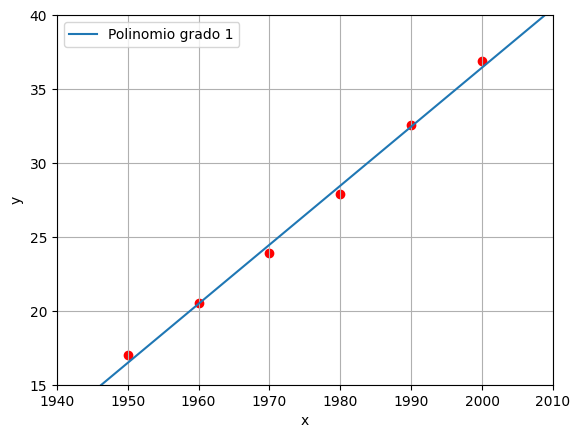

In [314]:
x = np.linspace(17, 2010, 200)
plt.plot(x, polinomio(x), label='Polinomio grado 1')
plt.scatter(tabla['x'], tabla['y'], c='red')
plt.xlim(1940, 2010)
plt.ylim(15, 40)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

##### Inciso B
Agregamos nuevos valores x y partimos de un polinomio previamente calculado

In [315]:
x = [1955,1965,1975,1985,1995]
y = []
for x_i in x:
    print("Poblacion",x_i,"=",round(polinomio(x_i), 1),"millones")
    y.append(polinomio(x_i))

Poblacion 1955 = 18.5 millones
Poblacion 1965 = 22.5 millones
Poblacion 1975 = 26.5 millones
Poblacion 1985 = 30.5 millones
Poblacion 1995 = 34.5 millones


##### Inciso C

Este fue nuestro error de los datos reales

In [316]:
y_reales = [18.8,22.2,25.9,30.2,34.8]

In [317]:
error = np.linalg.norm( np.array(y_reales) - np.array(y) )
print("error absoluto =", error)

error absoluto = 0.8281799841626337


Es decir erramos en general un aproximado de 0.83 millones de habitantes

In [318]:
error = np.linalg.norm( np.array(y_reales) - np.array(y) ) / np.linalg.norm( np.array(y_reales) )
print("error relativo =", error)

error relativo = 0.013726629036303142


Porcentualmente tenemos un error del 1.36% !

Graficamos estos nuevos valores (y_reales) y lo comparamos con nuestro polinomio

In [319]:
x = [1955,1965,1975,1985,1995]
y_reales = [18.8,22.2,25.9,30.2,34.8]
tabla = pd.DataFrame({'x': x, 'y': y})

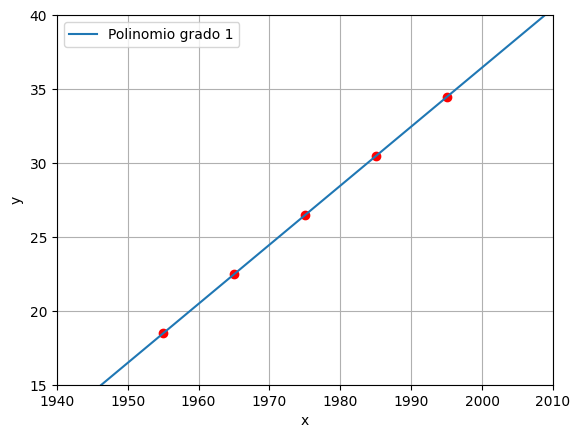

In [320]:
x = np.linspace(17, 2010, 200)
plt.plot(x, polinomio(x), label='Polinomio grado 1')
plt.scatter(tabla['x'], tabla['y'], c='red')
plt.xlim(1940, 2010)
plt.ylim(15, 40)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Observemos como el poloniomio pasa muy cercano a los puntos, pues tenemos 1,36% de error. 

Entonces podemos decir que la inferencia en el Inciso B es bastante buena!

### Ejercicio 7

In [321]:
f = lambda x: 1/(1+25*(x)**2)

In [322]:
def puntos_equiespaciados(a, b, n):
    puntos = [a]
    for k in range(1, n):
        x = a + k * ( (b-a)/n )
        puntos.append(x)
    puntos.append(b)

    return puntos

In [323]:
def graficar_funcion(funcion, titulo, mas_de_una_funcion=False):
    puntos = np.linspace(-1, 1, 100)
    plt.plot(puntos, funcion(puntos), label=titulo )
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    if mas_de_una_funcion == False:
        plt.show()

In [324]:
def graf_poli_interpolador(intervalo, cantidad_puntos, funcion, solo_polinomio=False):
    n = cantidad_puntos
    x = puntos_equiespaciados(intervalo[0], intervalo[1], n)
    y = [funcion(x_i) for x_i in x]
    poli_interpolador = np.poly1d(np.polyfit(x, y, n))
    if solo_polinomio == False:
        graficar_funcion(funcion, 'F', True)
        plt.scatter(x, y, c='red', label='puntos')
        graficar_funcion(poli_interpolador, 'poli, n={}'.format(n), True)
        plt.show()
    else:
        return x, poli_interpolador

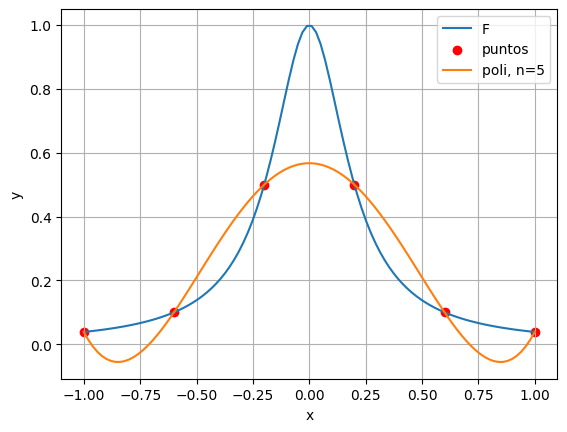

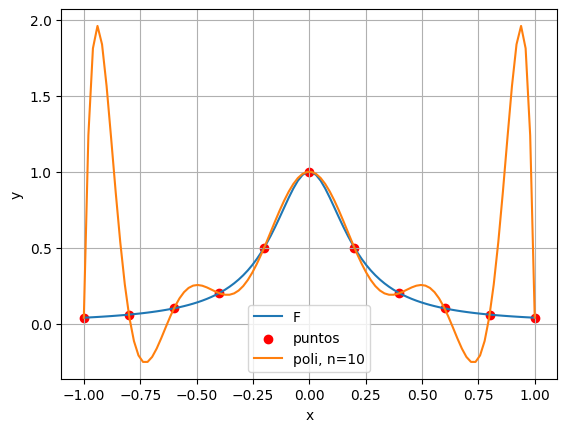

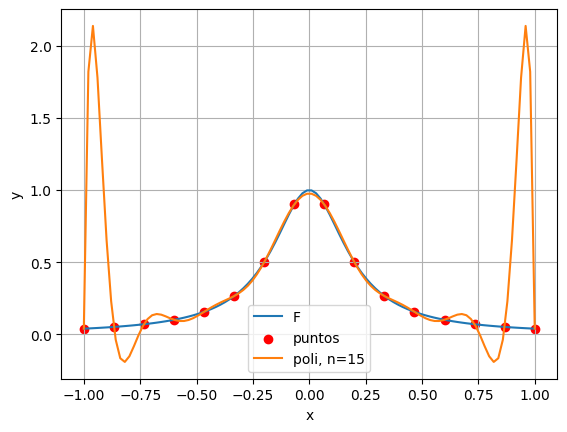

In [325]:
graf_poli_interpolador((-1,1), 5, f)
graf_poli_interpolador((-1,1), 10, f)
graf_poli_interpolador((-1,1), 15, f)

Observamos como polinomio interpolador pareciera que se va aproximando a F cada vez mas para n mas altos. Sin embargo, si vemos el polinomio en nuestros bordes, este dispara el error. 
Entonces, no vamos a tener un polinomio de mejor aproximacion en sentido de cuadrados minimos para un n mas alto, sino que, lo tendremos para un n que minimice la diferencia entre el polinomio y F

In [326]:
x, poli = graf_poli_interpolador((-1,1), 5, f, True)
norma_infinito = np.max( [np.abs(f(x_i) - poli(x_i)) for x_i in x] ) 
print("Norma infinita de F - P_5 =", norma_infinito)

x, poli = graf_poli_interpolador((-1,1), 10, f, True)
norma_infinito = np.max( [np.abs(f(x_i) - poli(x_i)) for x_i in x] ) 
print("Norma infinita de F - P_10 =", norma_infinito)

x, poli = graf_poli_interpolador((-1,1), 15, f, True)
norma_infinito = np.max( [np.abs(f(x_i) - poli(x_i)) for x_i in x] ) 
print("Norma infinita de F - P_15 =", norma_infinito)

Norma infinita de F - P_5 = 3.608224830031759e-16
Norma infinita de F - P_10 = 1.1671219546371958e-13
Norma infinita de F - P_15 = 3.104988488544791e-12


Aca vemos que para un n=5 aproximamos mejor que para un n mas alto.

Este fenomeno es conocido como el "Fenomeno de Runge" el cual dice que para una funcion
$$
F(x)=\frac{1}{1+25x^2}.\
$$ 
y n + 1 puntos equiespaciados tenemos que:
$$
\lim_{{n \rightarrow \infty}} \left( \max_{{-1 \leq x \leq 1}} | f(x) -P_n(x)| \right) = \infty
$$


Es decir que, para cuando n tiene a infinito, nuestro error tiende a infinito

### Ejercicio 8

In [327]:
x = [1950,1960,1970,1980,1990,2000]
y = [17,20.5,23.9,27.9,32.6,36.9]

tabla = pd.DataFrame({'x': x, 'y': y})

A = matriz_van_der_monde((tabla['x']), 5)

coeficientes = np.linalg.solve( np.transpose(A)@A, np.transpose(A)@np.log(y))[::-1]

polinomio = np.poly1d(coeficientes)
print(polinomio)

            5             4             3             2
-7.743e-20 x - 1.502e-16 x - 2.965e-13 x - 5.851e-10 x - 1.155e-06 x + 3.253


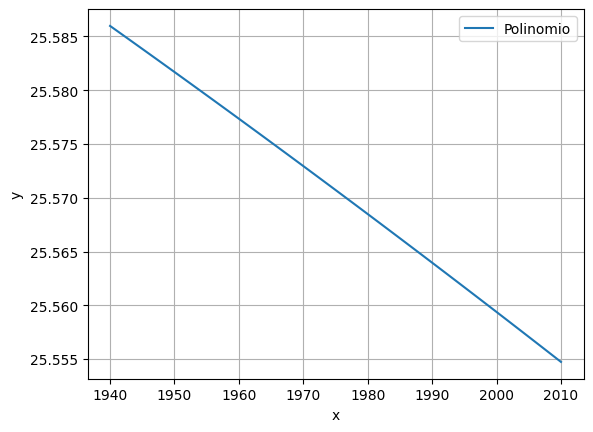

In [328]:
x = np.linspace(1940, 2010, 100)
plt.plot(x, np.e ** polinomio(x), label='Polinomio')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Observamos que nuestro polinomio de grado 5 es un pesimo aproximador porque no se relaciona con nuestro set de datos, el cual podemos ver que claramente la poblacion aumenta a lo largo de los años

Ajustamos con un polinomio de grado 1:

In [329]:
A = matriz_van_der_monde((tabla['x']), 1)

coeficientes = np.linalg.solve( np.transpose(A)@A, np.transpose(A)@np.log(y))[::-1]

polinomio = np.poly1d(coeficientes)
print(polinomio)

 
0.01549 x - 27.35


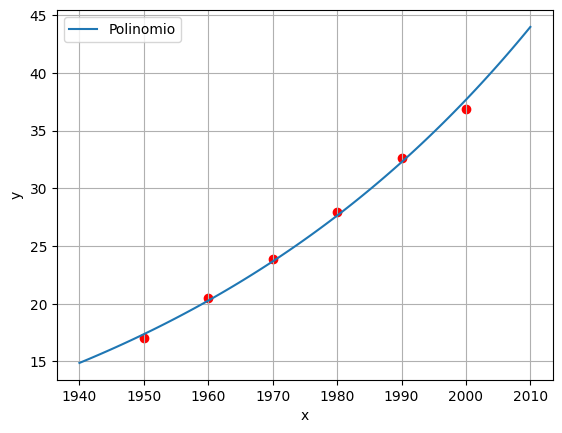

In [330]:
x = np.linspace(1940, 2010, 100)
plt.plot(x, np.e ** polinomio(x), label='Polinomio')
plt.scatter(tabla['x'], tabla['y'], c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()